In [14]:
# Compare Algorithms
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC




import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
# from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [15]:
data = "../Resources/FINAL_CLEAN_FILE.csv"

# read to dataframe
data_df = pd.read_csv(data)
data_df.head()

,VAERS_ID,SYMPTOM,ASSIGNED_GROUP,SEVERITY_LEVEL,DIED,L_THREAT,HOSPITAL,AGE_YRS,AGE_GROUP,OTHER_MEDS,...,VAX_SITE_RA,18-25,26-35,36-45,46-55,56-65,66-75,76-85,86-95,96 +
0,916600,Dysphagia,Difficulty swallowing,MILD,0.0,0.0,0.0,33.0,26-35,0.0,...,0.0,0,1,0,0,0,0,0,0,0
1,917168,Dysphagia,Difficulty swallowing,MILD,0.0,0.0,0.0,64.0,56-65,1.0,...,1.0,0,0,0,0,1,0,0,0,0
2,918386,Dysphagia,Difficulty swallowing,MILD,0.0,0.0,0.0,62.0,56-65,1.0,...,1.0,0,0,0,0,1,0,0,0,0
3,918393,Dysphagia,Difficulty swallowing,MILD,0.0,0.0,0.0,62.0,56-65,1.0,...,1.0,0,0,0,0,1,0,0,0,0
4,918479,Dysphagia,Difficulty swallowing,MILD,0.0,0.0,0.0,37.0,36-45,1.0,...,1.0,0,0,1,0,0,0,0,0,0


In [16]:
severity = data_df['SEVERITY_LEVEL'].unique()
severity

array(['MILD', 'MODERATE', 'SEVERE'], dtype=object)

In [17]:
# create train data
X = data_df.drop(['VAERS_ID', 'SYMPTOM','ASSIGNED_GROUP','SEVERITY_LEVEL','HOSPITAL','AGE_YRS', 'AGE_GROUP'], axis=1)
X

,DIED,L_THREAT,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,ALLERGIES,F,M,JANSSEN,...,VAX_SITE_RA,18-25,26-35,36-45,46-55,56-65,66-75,76-85,86-95,96 +
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0,1,0,0,0,0,0,0,0
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0,0,0,0,1,0,0,0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0,0,0,0,1,0,0,0,0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0,0,0,0,1,0,0,0,0
4,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26477,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0,0,0,0,0,1,0,0,0
26478,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0,0,0,0,0,0,1,0,0
26479,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0,0,0,0,0,0,1,0,0
26480,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0,0,0,0,0,0,1,0,0


In [18]:
# create train data
X = data_df.drop(['VAERS_ID', 'SYMPTOM','ASSIGNED_GROUP','SEVERITY_LEVEL','HOSPITAL','AGE_YRS', 'AGE_GROUP'], axis=1)
X


,DIED,L_THREAT,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,ALLERGIES,F,M,JANSSEN,...,VAX_SITE_RA,18-25,26-35,36-45,46-55,56-65,66-75,76-85,86-95,96 +
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0,1,0,0,0,0,0,0,0
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0,0,0,0,1,0,0,0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0,0,0,0,1,0,0,0,0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0,0,0,0,1,0,0,0,0
4,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26477,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0,0,0,0,0,1,0,0,0
26478,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0,0,0,0,0,0,1,0,0
26479,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0,0,0,0,0,0,1,0,0
26480,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0,0,0,0,0,0,1,0,0


In [19]:
y = LabelEncoder().fit_transform(data_df['SEVERITY_LEVEL'])
y


array([0, 0, 0, ..., 2, 1, 1])

In [4]:
# # load dataset
# url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# dataframe = pandas.read_csv(url, names=names)
# array = dataframe.values
# X = array[:,0:8]
# Y = array[:,8]

In [22]:


X = array[:,0:8]
Y = array[:,8]

In [5]:
# dataframe



,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [27]:
# prepare configuration for cross validation test harness
seed = 7

In [28]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [29]:




# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


C:\Users\D\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\D\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\D\anacond

LR: 0.776042 (0.045054)
LDA: 0.766969 (0.047966)
KNN: 0.710988 (0.050792)
CART: 0.692874 (0.052840)
NB: 0.759142 (0.038960)
SVM: 0.760458 (0.034712)


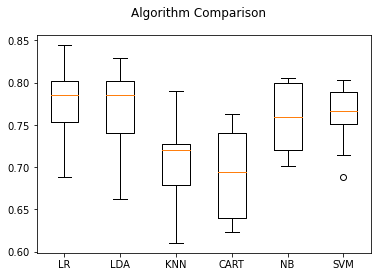

In [30]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()